In [ ]:
pip install -U sentence_transformers

## **1. chargement des library et des données**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

## **2. application de t-sne**

In [ ]:

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(corpus)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())


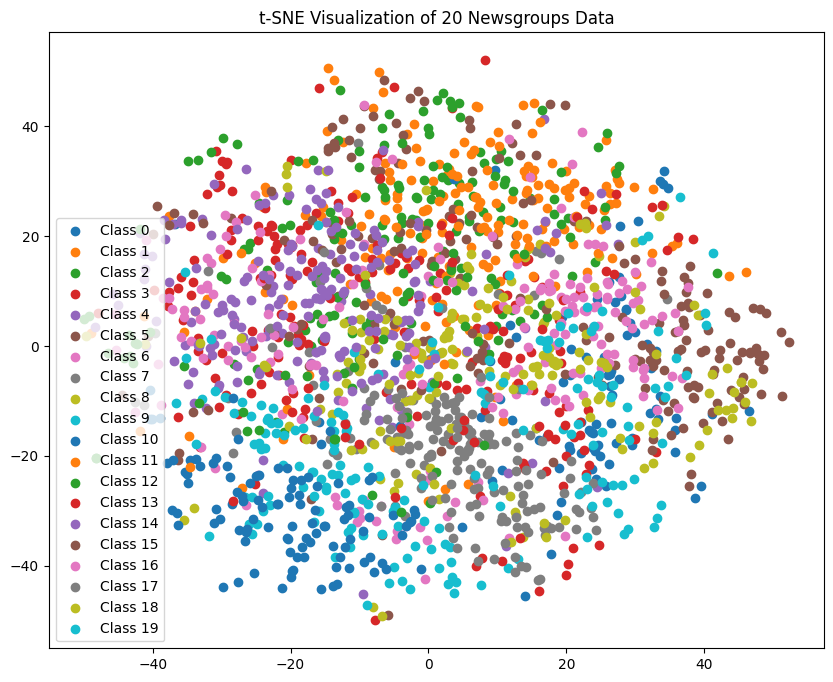

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], label=f'Class {i}')

plt.title('t-SNE Visualization of 20 Newsgroups Data')
plt.legend()
plt.show()